In [1]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets 

In [3]:
kch = pd.read_csv('kc_house_data.csv')
kch.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
0 in kch['yr_renovated'].unique()
0 in kch['bedrooms'].unique()
0 in kch['bedrooms'].unique()

True

In [6]:
kch['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [7]:
kch['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [8]:
kch['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [9]:
#Let's drop all the renovated also with no bed and no bath!
kch2 = kch[kch['yr_renovated']==0]
kch2 = kch2[kch2['bedrooms']!=0]
kch2 = kch2[kch2['bathrooms']!=0]
kch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20683 entries, 0 to 21612
Data columns (total 21 columns):
id               20683 non-null int64
date             20683 non-null object
price            20683 non-null float64
bedrooms         20683 non-null int64
bathrooms        20683 non-null float64
sqft_living      20683 non-null int64
sqft_lot         20683 non-null int64
floors           20683 non-null float64
waterfront       20683 non-null int64
view             20683 non-null int64
condition        20683 non-null int64
grade            20683 non-null int64
sqft_above       20683 non-null int64
sqft_basement    20683 non-null int64
yr_built         20683 non-null int64
yr_renovated     20683 non-null int64
zipcode          20683 non-null int64
lat              20683 non-null float64
long             20683 non-null float64
sqft_living15    20683 non-null int64
sqft_lot15       20683 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [10]:
kch.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
kch2 = kch2[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','price']]

In [12]:
kch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20683 entries, 0 to 21612
Data columns (total 7 columns):
bedrooms         20683 non-null int64
bathrooms        20683 non-null float64
sqft_living      20683 non-null int64
grade            20683 non-null int64
sqft_above       20683 non-null int64
sqft_basement    20683 non-null int64
price            20683 non-null float64
dtypes: float64(2), int64(5)
memory usage: 1.3 MB


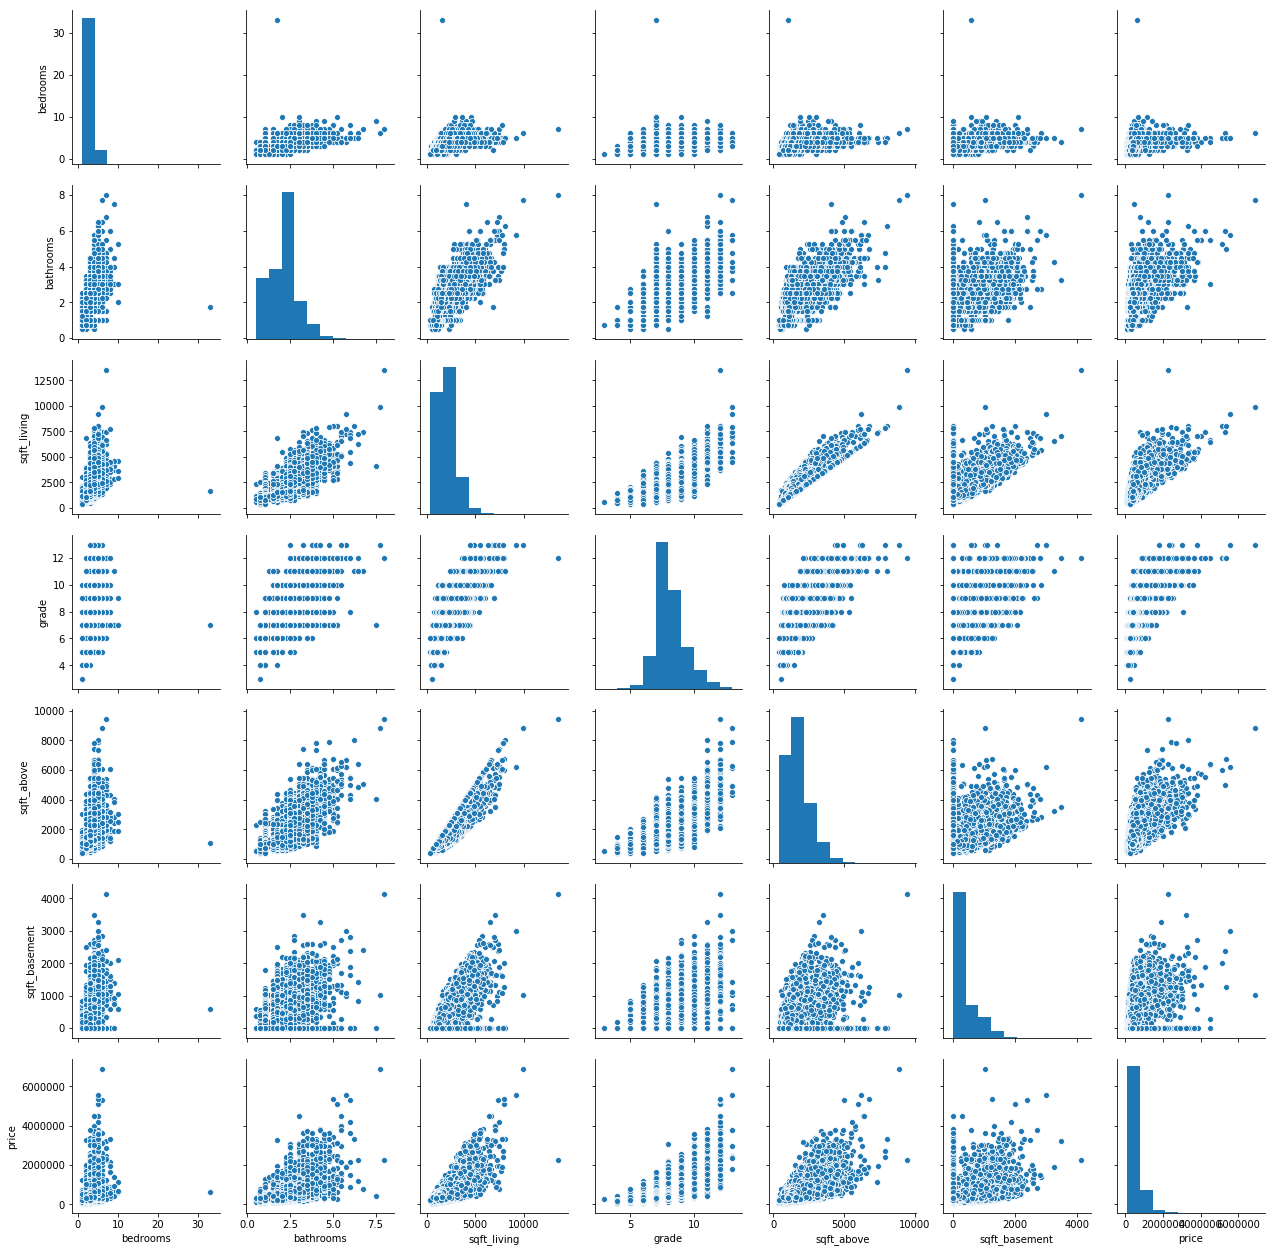

In [13]:
sns.pairplot(kch2)

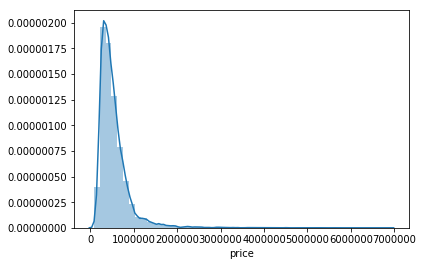

In [14]:
sns.distplot(kch2['price'])

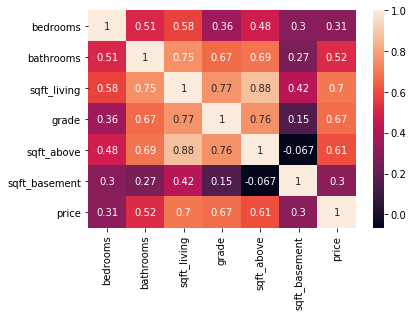

In [15]:
sns.heatmap(kch2.corr(), annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = kch2[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement']]
y = kch2['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
x_train.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement
15999,4,2.50,2340,7,2340,0
15104,3,1.00,1220,6,1220,0
18728,3,1.00,1100,7,1100,0
18336,4,1.75,2130,7,1330,800
21329,3,2.50,1440,8,1440,0


In [19]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
lm = linear_model.LinearRegression()


In [21]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(lm.intercept_)
#print(lr.intercept_)

-524935.0826241778


In [23]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-34122.693100
bathrooms,-28521.665400
sqft_living,148.596440
grade,107024.492278
sqft_above,41.972885
sqft_basement,106.623555


In [24]:
predictions = lm.predict(x_test)

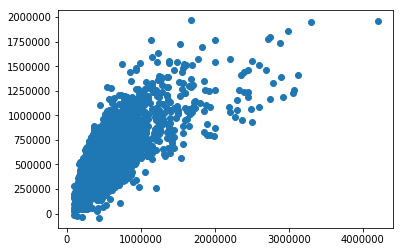

In [25]:
plt.scatter(y_test,predictions)
#plt.xlabel('trained price')
#plt.ylabel('predicted price')

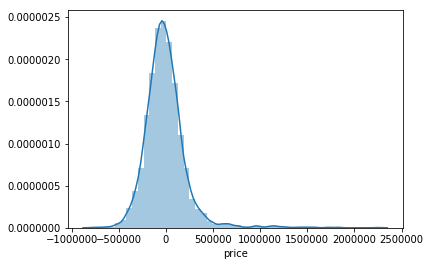

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 150777.5265543636
MSE: 50053539201.03185
RMSE: 223726.48301225284


In [28]:
score = lm.score(x_test, y_test)
print(lm.score(x_test, y_test))

0.5522903028359603


# linear


In [29]:
# y = 10000000
#print(y)
#import numpy as np
#estimate_house_price = lm.predict(x_test)
predictions = predictions.reshape(-1, 1)
#print(y, np.transpose(estimate_house_price))
#print(estimate_house_price)

In [30]:
#data.drop['name'] drop columns
#data.drop_duplicates() remove duplicates
#data.replace('value to change', 'new value') replace value
#data.replace(index{0: 'new name'}) change index name
#data.assign(new_column='new value') create new column and assign all the values to new values
#data.rename('column name':'column new name') rename columns 

In [31]:
print(y, predictions)

0         221900.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
30        580500.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [32]:
#kch_p = kch2[['price', 'prediction']]

In [33]:
#kch2 = kch2[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','price']]

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(x_train, y_train)
lm2.predict(x_test)

    

array([310020.192132  , 514678.7259811 , 275928.59139059, ...,
       497186.65472136, 299869.51990043, 359042.37037429])

In [37]:
#coeff_df = pd.DataFrame(lm2.coef_,x.columns,columns=['Coefficient'])
#coeff_df

In [38]:
predictions = lm2.predict(x_test)

In [39]:
score = lm2.score(x_test, y_test) 
print(score)

0.6105388952790948


# poly

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.svm import SVR
lm3 = SVR(kernel='linear').fit(x_train, y_train)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.svm import SVR
lm3 = SVR(kernel='linear').fit(x_train, y_train)

In [42]:
predictions = lm3.predict(x_test)

In [43]:
score = lm3.score(x_test, y_test) 
print(score)

0.4608751187178677


# poly linear

# SVR linear

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsRegressor
lm4 = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
predictions = lm4.predict(x_test)
score = lm4.score(x_test, y_test)
print(score)



0.486667600461723


# KNN

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.tree import DecisionTreeRegressor
lm5 = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
predictions = lm5.predict(x_test) 
print(score)

0.486667600461723


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
lm6 = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
predictions = lm6.predict(x_test) 
print(score)

0.486667600461723


In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

48474137376.976006


In [49]:
colors=['blue', 'purple', 'green']
k=[30,50,100]
scores = []
for i in range(3):
   lm6 = RandomForestRegressor(n_estimators=k[i]).fit(x_train, y_train)
   plt.plot(x_grid, lm6.predict(x_grid), color=colors[i], label=k[i])
   predictions = lm6.predict(x_test)
plt.title('RF Regression')
plt.legend()
plt.scatter(x, y, color='red')
plt.xlabel('trained price')
plt.ylabel('predicted price')
plt.show()             

NameError: name 'x_grid' is not defined